# Input und Output

In den ersten Notebooks haben wir gelernt, dass wir in Python effizient mit Objekten verschiedenster Datentypen arbeiten, indem wir sie Variablen zuweisen. Am Anfang hatten wir es bloß mit kleinen Objekten zu tun – etwa mit einzelnen Wörtern oder, wenn's hoch kam, mit Sätzen. Diese haben wir bei der Variablenzuweisung jeweils komplett ausgeschrieben:

```sentence = "Am Anfang haben wir eine Zeichenkette noch ausgeschrieben."```

Im letzten Notebook haben wir dann zum ersten Mal mit größeren Objekten gearbeitet, nämlich mit den Koalitionsverträgen. Aufgrund der Größe (und der Tatsache, dass wir die Texte bereits extern in einer Datei vorliegen hatten) haben wir uns die Texte vom externen Speicherort in den Arbeitsspeicher geladen und einer Variablen zugewiesen.

Da wir fortan häufig mit größeren externen Dateien arbeiten, schauen wir uns in diesem Notebook genauer an, wie der sog. *Input* von Dateien funktioniert. Ebenso schauen wir uns das andere Ende an, nämlich den *Output* von Dateien, also das Speichern von Dateien auf einem externen Laufwerk. In diesem Notebook geht es also nicht primär darum, wie wir mit Daten *in* Python arbeiten, sondern wie diese Daten überhaupt erst für Python verarbeitbar werden und wie wir sie nach einer Verarbeitung durch Python wiederum für die Welt außerhalb Pythons zugänglich machen. 

Weiter lernen wir in diesem Notebook, wie Benutzer:innen über Input für ein laufendes Programm dessen Ablauf beeinflussen oder kontrollieren können (wir haben diese Funktion bereits im dritten Notebook beim Oktopus-Ratespiel benutzt). Dadurch können wir interaktive Programme schreiben. Abschließend gehen wir detailliert auf die allgegenwärtige ```print```-Funktion ein. Diese stellt ja auch eine Form von Output bereit, zwar (standardmäßig) nicht als Datei, aber als Zeichenkette in der Ausgabe.

Auch in diesem Notebook gibt es einen Anwendungsfall, den wir am Ende unter Einbezug der meisten hier erlernten Techniken lösen können. Mehr dazu weiter unten.

Dieses Notebook ist recht umfangreich und es ist empfehlenswert, sich die Inhalte verteilt über zwei oder mehr Lernsesssions anzuschauen.

## Dateipfade

Um Dateien von einem bestimmten Ort auf dem Laufwerk einzulesen bzw. an einem bestimmten Ort auszugeben, müssen wir uns mit Dateipfaden vertraut machen. Jede Datei auf Deinem Computer hat bekanntlich einen Namen, ein Dateisuffix (etwa ".txt", wird z.T. ausgeblendet) und die Datei befindet sich in einem bestimmten Verzeichnis (auch *Ordner* genannt). Dieses Verzeichnis befindet sich wiederum in einem Verzeichnis, und so weiter, bis zum obersten Verzeichnis, dem Stamm des Laufwerks. Jede Datei hat also eine einzigartige Adresse und diese Adresse wird *Dateipfad* genannt. 

Wie Du gleich sehen wirst, gibt es zwei Arten, einen Dateipfad anzugeben, nämlich absolut und relativ. Zusätzlich unterscheiden sich Dateipfade zwischen macOS und Windows. Dateipfade zu verstehen, ist überaus wichtig, um frustrierenden ```FileNotFoundError```-Fehlern vorzubeugen. 

### Absolute Dateipfade
Ein Dateipfad kann immer absolut, d.h. vollständig vom Stamm des Laufwerks bis zur gewünschten Datei, angegeben werden. Um an den absoluten Pfad einer beliebigen Datei heranzukommen, gibt es folgende Tricks:
- Unter macOS: Navigiere im Finder zur gewünschten Datei und klicke die Datei mit zwei Fingern an (Rechtsklick), es öffnet sich ein Menüfenster. Drücke die Taste *Option ⌥*, wodurch sich einige Menüoptionen ändern. Wähle *"Datei" als Pfadname kopieren*. Ein vollständiger Pfad unter macOS sieht z.B. so aus: "/Users/Name/Documents/Project/Folder/Notebook.ipynb", beachte, dass Schrägstriche "/" verwendet werden sowie, dass der absolute Pfad mit einem Schrägstrich beginnt.
- Unter Windows: Navigiere im Explorer zur gewünschten Datei und klicke die Datei mit einem Rechtsklick an, während du Shift gedrückt hältst. Es öffnet sich ein Menüfenster. Wähle *Als Pfad kopieren*. Ein vollständiger Pfad unter Windows sieht z.B. so aus: "C:\Users\Name\Documents\Project\Folder\Notebook.ipynb", beachte, dass Backslashes "\\" verwendet werden sowie, dass der absolute Pfad ohne Backslash beginnt. ⚠️ Achtung: der Backslash "\\" hat bei Python eine Spezialbedeutung innerhalb von strings, wie etwa bei "\n", das bekanntlich für einen Zeilenumbruch steht. Um Python bei einem Windows-Dateipfad mitzuteilen, dass die darin verwendeten Backslashes nicht als Spezialzeichen interpretiert werden sollen, müssen wir ein "r" vor das öffnende Anführungszeichen stellen. Obiger Pfad innerhalb von Python-Code muss also so ausschauen: r"C:\Users\Name\Documents\Project\Folder\Notebook.ipynb".

In beiden Fällen wird der Pfad in die Zwischenablage kopiert und Du kannst ihn anschließend in Deinen Code einfügen (am besten mit der Tastenkombination ```command ⌘```+ ```V``` (macOS) / ```Strg```+ ```V``` (Windows)).

Beachte, dass die obersten Verzeichnisse eines absoluten Pfades, also diejenigen, die vom System vorgegeben sind, z.T. auf Englisch angegeben werden (selbst wenn sie in Deinem Dateimanager auf Deutsch angezeigt werden). Im vollständigen Pfad steht also ggf. *Users* und nicht *Benutzer*. Das geschieht aber automatisch, wenn Du den Pfad wie oben beschrieben kopierst.

***

✏️ **Übung 1:** Navigiere in Deinem Dateimanager zu fünf beliebigen Dateien in fünf verschiedenen Verzeichnissen. Kopiere die absoluten Dateipfade wie oben beschrieben und weise je einen Dateipfad einer der folgenden Variablen zu (innerhalb der Anführungszeichen).

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben (so viel zu coden gibt es hier nicht 😅)

path_file1 = ""
path_file2 = ""
path_file3 = ""
path_file4 = ""
path_file5 = ""

***

### Relative Dateipfade

Ein Dateipfad kann stets auch relativ, d.h. vom aktuellen Arbeitsverzeichnis aus gesehen, angegeben werden. Am einfachsten ist das natürlich bei einer Datei, die sich im aktuellen Arbeitsverzeichnis befindet. Um auf diese zuzugreifen, geben wir bloß ihren Namen als Pfad an. 

Weiter können wir vom aktuellen Arbeitsverzeichnis aus in ein (darin befindliches) Unterverzeichnis navigieren. Dazu beginnt der relative Pfad mit dem Namen des Unterverzeichnis, gefolgt von einem Schrägstrich sowie dem Namen der Datei. Diese Schreibweise mit dem Schrägstrich funktioniert innerhalb Pythons auf allen Betriebssystemen. Unsere Schnittstelle zu externen Dateien, die weiter unten vorgestellte `open`-Funktion, kümmert sich bei relativen Pfaden wenn nötig um die Konversion von Schrägstrich zu Backslash. 

Letztlich können wir vom aktuellen Arbeitsverzeichnis aus auch aufwärts (zum Stamm des Laufwerks hin) navigieren. Indem wir zwei Punkte und einen Schrägstrich, also "../", an den Anfang des relativen Pfads stellen, rücken wir eine Ebene nach oben (und durch "../../" zwei Ebenen, etc.). Im Anschluss an den Schrägstrich folgt der Name der Datei, die sich im Oberverzeichnis befindet. Natürlich können wir vom Oberverzeichnis aus auch in ein *anderes* Unterverzeichnis als das aktuelle Arbeitsverzeichnis (eine Art "Schwesterverzeichnis") navigieren.

Relative Dateipfade sind zwar fehleranfälliger als die einfach zu kopierenden, absoluten Dateipfade. Sie sind aber aus dreierlei Gründen zu bevorzugen: Erstens sind sie i.d.R. kürzer. Zweitens funktionieren sie auf allen Betriebssystemen. Drittens sind sie stabiler, da sie auch nach dem Verschieben oder Teilen eines Notebooks funktionieren, sofern die darin aufgerufenen Dateien entsprechend mitverschoben bzw. mitgeteilt wurden. Aus diesem Grund werden in diesen Notebooks auch stets relative Dateipfade verwendet und Du wurdest anfangs darum gebeten, die Ordnerstruktur der heruntergeladenen Dateien nicht zu verändern. Die hier verwendeten, relativen Dateipfade funktionieren solange, wie Du die Ordnerstruktur (konkret: das Verzeichnis "3_Dateien" und die darin befindlichen Ordner und Dateien) nicht veränderst. 

Versuche also immer relative Dateipfade zu verwenden.

## Das `os`-Modul

Im Zusammenhang mit Dateien auf Deinem Laufwerk ist das Modul `os` mit den Funktionen `getcwd`, `chdir` und `listdir` äußerst hilfreich. Sie werden in der folgenden Zelle angewandt und mithilfe von Kommentaren beschrieben:

In [ ]:
import os

#gibt das aktuelle Arbeitsverzeichnis aus ("get current working directory")
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

"""mit dieser Funktion könnte man das aktuelle Arbeitsverzeichnis ändern; das tun wir aber nicht, 
da die relativen Dateipfade weiter unten im Notebook sonst nicht mehr korrekt wären (s.o)."""
#os.chdir("new_path")

"""gibt die im aktuellen Arbeitsverzeichnis (oder beim in Klammern angegebenen Pfad) befindlichen Unterverzeichnisse 
und Dateien als Liste aus; darunter auch einige, die vom Dateimanager i.d.R. ausgeblendet werden"""
print("\nDarin befindliche Unterverzeichnisse und Dateien: ")
for file in os.listdir():
    print(file)

Denk daran, dass Du ein externes Modul wie ```os``` am Anfang jedes Notebooks importieren musst, um damit arbeiten zu können. 

Wie im vierten Notebook erklärt, müssen wir vor den Funktionsnamen jeweils den Modulnamen sowie einen Punkt setzen (z.B. ```os.getcwd```), damit Python weiß, wo sich die gewünschte Funktion befindet. Alternativ könnten wir auch den ```import```-Befehl zu ```from os import getcwd, chdir, listdir``` ändern und die entsprechenden Funktionen ohne Modulnamen davor aufrufen.

Wenn Du es versäumst, ```os``` am Anfang zu importieren, erhältst Du ```NameError: name 'os' is not defined``` zurück. Das ist die gleiche Fehlermeldung, wie wenn Du versuchst mit einer (noch) nicht definierten Variable zu arbeiten. In beiden Fällen kann Python schlicht nichts mit den *Namen* anfangen.

***

✏️ **Übung 2:** Das aktuelle Arbeitsverzeichnis auf einem Windows-Rechner sei "C:\Users\Name\Documents\Project\Folder". Du möchtest auf eine Datei zugreifen, die folgenden absoluten Dateipfad besitzt: "C:\Users\Name\Documents\Resources\file.csv". Mithilfe welchen relativen Pfads können wir in Python auf "file.csv" zugreifen?

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben (immer noch nichts zu coden 😅)




***

## 🔧 Anwendungsfall: Einen Gedankenprotokollanten programmieren

Beim Anwendungsfall in diesem Notebook wollen wir ein interaktives Programm schreiben, mit dessen Hilfe eine Benutzerin schlaue Gedanken protokollieren kann. Die Benutzerin soll durch das Programm geführt werden und entscheiden können, wo, d.h. in welchem (externen) Dokument, sie ihre Gedanken festhalten will. Sie soll sowohl neue Dokumente anlegen können, als auch in bestehende reinschreiben. Anschließend soll sie beliebig viele Gedanken in dieses Dokument einfügen können. Das folgende Video zeigt das fertige Programm "in Aktion":

In [ ]:
#Führe diese Zelle aus, um das Video einzubetten
from IPython.display import Video
Video("../3_Dateien/Grafiken_und_Videos/Gedankenprotokollant.mov", width=700)

Ohne dieses Programm würde die Benutzerin vermutlich ein Microsoft Word-Dokument öffnen, ihre Gedanken reinschreiben, das Dokument speichern und dann wieder schließen. Das Anlegen/Öffnen/Speichern/Schließen des Dokuments wollen wir ihr abnehmen und ihr stattdessen ermöglichen, ihre Gedanken über eine freundliche, aber sehr minimale Benutzeroberfläche (engl.: *user interface*, abgekürzt: *UI*) zu protokollieren.

Im Folgenden lernen wir die dafür notwendigen Grundlagen kennen.

***

## Die ```open```-Funktion

Die Schnittstelle zu externen Dateien bietet in Python die ```open```-Funktion. Sie öffnet externe Dateien mittels folgender grundlegender Syntax:

```open(file, mode)```

Bei ```file``` setzen wir den absoluten oder relativen Dateipfad zur zu öffnenden Datei ein, und zwar als Zeichenkette, inklusive des Dateisuffixes und natürlich umrahmt von Anführungszeichen. Über den Parameter ```mode``` müssen bzw. können wir spezifizieren, was wir mit der zu öffnenden Datei machen wollen. ```open``` stellt drei verschiedene Modi zur Verfügung:

- den Lesemodus für Input (```"r"```): dies ist der Standardmodus, der Parameter ```"r"``` wird deswegen i.d.R. weggelassen (vgl. viertes Notebook beim Öffnen der Koalitionsverträge)
- den Schreibmodus für Output (```"w"```): überprüft, ob die angegebene Datei im Verzeichnis existiert; wenn ja, wird deren Inhalt *über*schrieben; wenn nein, wird die Datei geschaffen und *be*schrieben
- den "Anhängmodus" für Output (```"a"``` von *append*): überprüft, ob die angegebene Datei im Verzeichnis existiert; wenn ja, werden Daten (z.B. neue Zeilen bei einer Datei in Tabellenform) im Anschluss an die bereits existierenden Daten in der angegebenen Datei angehängt; wenn nein, wird die Datei geschaffen und *be*schrieben

Zum Schreiben bzw. Anhängen sieht der Funktionsaufruf also so aus:

- ```open(file, "w")``` 
- ```open(file, "a")```

Die ```open```-Funktion akzeptiert neben ```file``` und ```mode``` weitere Parameter, z.B. ```encoding```, wo wir spezifizieren können, *wie* eine Datei enkodiert ist. Das Encoding einer Datei legt fest, nach welchem Schlüssel sämtliche Zeichen (Buchstaben in lateinischer Schrift sowie den allermeisten anderen Sprachen, Zahlen, Emojis...) in Nullen und Einsen übersetzt werden. Natürlich geht nichts ohne den korrekten Schlüssel. [UTF-8](https://de.wikipedia.org/wiki/UTF-8) von [Unicode](https://de.wikipedia.org/wiki/Unicode) ist Standard, sodass wir uns i.d.R. nicht den Kopf darüber zerbrechen müssen. Um Problemen vorzubeugen, lohnt es sich trotzdem, standardmäßig ```encoding=utf-8``` zu spezifizieren, und zwar beim Input sowie beim Output.

### Input

Wie wir bei den Koalitionsverträgen im letzten Notebook bereits gesehen haben, wird die ```open```-Funktion zum Lesen von externen Dateien wie folgt syntaktisch eingebunden:

```with open(file) as read_file:```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;```variable = read_file.read()```

Wir benutzen hier den sog. ```with```-Kontextmanager: Im ```with```-Statement öffnen wir mittels ```open``` das übergebene ```file``` und weisen die geöffnete Datei direkt einer Variablen zu (hier ```read_file```, aber wie immer kann man einen beliebigen Variablennamen wählen). 

Eingerückt darunter wenden wir die ```read```-Methode auf ```read_file``` an, d.h. die bislang nur geöffnete Datei wird nun eingelesen. Je nach dem, wie die externe Datei formatiert ist, müssen wir ```read``` durch eine andere geeignete Lesemethode ersetzen (s.u.). Das Resultat weisen wir in jedem Fall einer sinnvoll genannten ```variable``` zu. Die externe Datei befindet sich damit als Objekt im Arbeitsspeicher. 

Diese Syntax für den Dateiinput entspricht natürlichsprachlich ungefähr: "Mit (```with```) der zu öffnenden (```open```) Datei (```file```) als (```as```), nennen wir es, ```read_file```, tu alles, was nach dem Doppelpunkt (```:```) darunter eingerückt (```⇥```) steht (hier: lese (```read```) das ```read_file``` und weise es ```variable``` zu (```=```)).

Indem wir anschließend die Einrückung wieder verlassen, schließt der ```with```-Kontextmanager die externe Datei *automatisch*. Die brauchen wir ja auch nicht mehr, da wir deren Inhalt nun in einem Python-Objekt im Arbeitsspeicher haben. Die Verwendung von ```with``` beim Umgang mit externen Dateien ist *Best Practice*. Abweichend davon begegnet man auch folgender Herangehensweise:

```file = open("path")```

`content = file.read()`

```file.close() ```

In der ersten Zeile wird die externe Datei geöffnet und in der zweiten gelesen. Anschließend muss die Datei wieder *manuell* geschlossen werden. Oft wird jedoch genau dieser letzte Schritt vergessen. Gewöhne Dir also an, stets den ```with```-Kontextmanager im Umgang mit externen Dateien zu benutzen.

### Output

Für den Output von Dateien verwenden wir ebenfalls den ```with```-Kontextmanager sowie die ```open```-Funktion, aber wie oben erwähnt mit dem zusätzlichen Parameter ```"w"``` oder ```"a"```:

```with open(file, "w") as write_file:```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;```for line in data:```<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;```write_file.write(line + "\n")```

In diesem Beispiel iterieren wir über ein mit ```data``` referenziertes Listenobjekt (das wir im Code davor auf irgendeine Weise geschaffen haben) und schreiben mittels der ```write```-Methode jedes Element (```line```) in eine neue Zeile von ```write_file``` (die neue Zeile kommt durch den abschließenden Zeilenumbruch im ```write```-Befehl zustande). Wie beim Input wird ```write_file``` nach Verlassen der (äußeren) Einrückung automatisch geschlossen. Je nach gewünschtem Outputformat (z.B. als Textdatei oder als Tabelle) kommen andere Schreibmethoden als ```write``` zum Einsatz (s.u.).  

Im Folgenden schauen wir uns genauer an, wie wir mit den beiden wichtigsten Datenformaten, Textdateien und tabellarische Dateien, beim Input und Output umgehen.  

## Textdateien

Textdateien sind grundlegend nach Zeilen strukturierte Dateien. Das trifft sowohl auf Microsoft Office-Dokumente mit dem Suffix ".docx" zu, als auch auf sog. *Plain Text Files* (mit dem Suffix ".txt"). Letztere sind **nur** nach Zeilen strukturiert und können von den meisten Programmen auf sämtlichen Betriebssystemen und natürlich auch von Python geöffnet werden. Deshalb beschränken wir uns im Folgenden auf Plain Text Files. 

Am Ende jeder Zeile in einer solchen Textdatei steht ein Zeilenumbruch, der als ```"\n"``` (ausgesprochen: *backslash n* oder *newline*) codiert wird. Wenn wir eine ".txt"-Datei z.B. in Microsoft Word öffnen, werden uns i.d.R. nur die Zeilenumbrüche, nicht aber die dafür verantwortlichen Zeichen angezeigt (links im Screenshot unten). Optional können wir sie uns aber einblenden lassen (rechts im Screenshot unten).

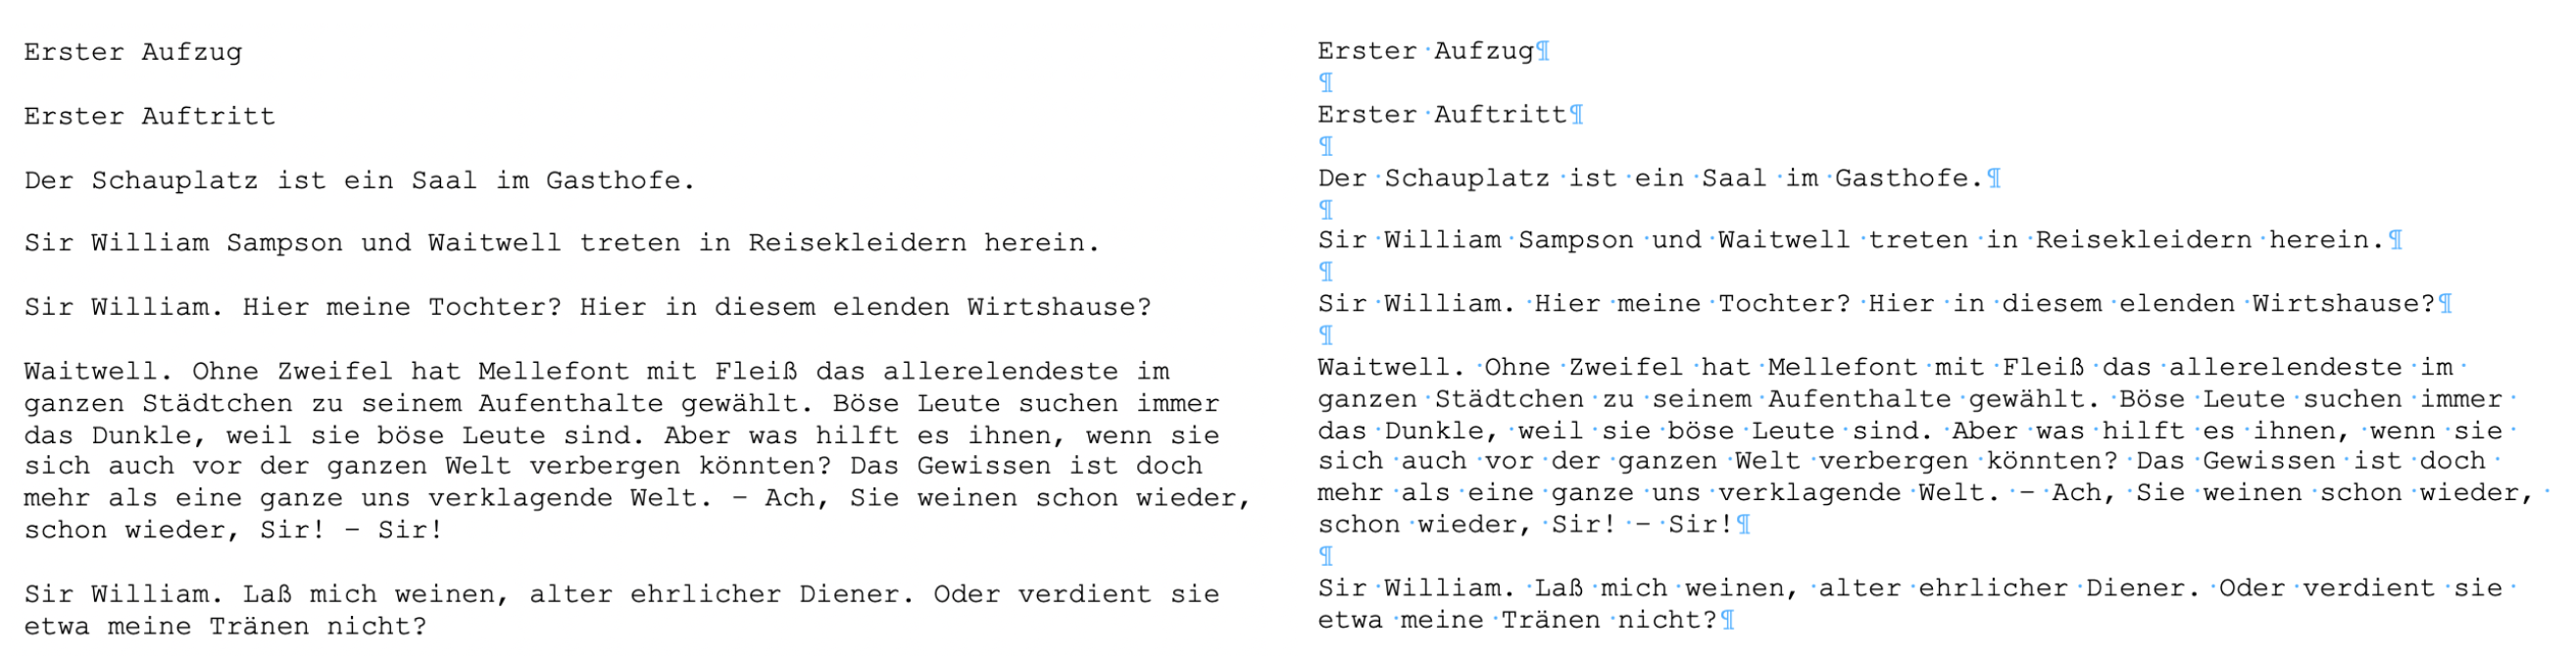

Hier handelt es sich um die ersten paar Zeilen aus Gotthold Ephraim Lessings [Miss Sara Sampson](https://www.projekt-gutenberg.org/lessing/sampson/sampson.html). 

An den sichtbar gemachten Zeichen für Zeilenumbrüche sehen wir, dass die letzten beiden Redebeiträge jeweils nur in einer einzigen Zeile gespeichert sind. Hier werden sie bloß aufgrund der horizontalen Begrenzung des Fensters auf mehreren Zeilen angezeigt.

Auch bei Python werden Zeilenumbrüche nur in gewissen Fällen als Zeichen angezeigt, wie wir gleich sehen werden. Damit arbeiten können wir aber in jedem Fall, also auch wenn Zeilenumbrüche als Zeichen bei einer Ausgabe mal nicht angezeigt werden.

Das wollen wir jetzt ausprobieren. Dazu lesen wir den im Screenshot gezeigten Text sowie den Rest des ersten Aufzugs aus dem Trauerspiel in Python ein. Die Datei befindet sich im Ordner "3_Dateien/Miss_Sara_Sampson". Die simpelste Methode zum Einlesen einer Datei heißt wie oben erwähnt ```read```:

In [ ]:
#um in den Ordner "3_Dateien" zu gelangen, navigieren wir mit "../" erst eine Ordnerebene nach oben
with open("../3_Dateien/Miss_Sara_Sampson/Miss_Sara_Sampson_Aufzug_1.txt", encoding="utf-8") as read_file:
    miss_sara_sampson = read_file.read()
    
print(miss_sara_sampson[0:200], "\n")

"""Tipp: im Output hier werden Zeilenumbrüche nicht als Zeichen angezeigt; 
will man dies forcieren, kann man die repr-Funktion verwenden"""
#print(repr(miss_sara_sampson[0:200]))

print(len(miss_sara_sampson))

Bei ```read``` wird die gesamte Textdatei in einen einzigen langen string überführt. Da der erste Aufzug recht lange ist (26960 Zeichen), geben wir hier mithilfe von Slicing nur die ersten 200 Zeichen aus. Indem Du die eckigen Klammern entfernst, kannst Du Dir den gesamten ersten Aufzug zu Gemüte führen (das ist nicht nötig, aber fürs weitere Verständnis lohnt es sich, ihn zumindest zu überfliegen).

Natürlich wollen wir den Text nicht nur lesen. Dafür hätten wir ein beliebiges Textverarbeitungsprogramm verwenden und uns das Programmieren sparen können. Programmieren bringt erst dann einen Vorteil, wenn wir es mit sinnvoll strukturierten Daten zu tun haben (dieses Merkmal ist hier ja u.a. durch die Zeilenumbrüche gegeben) und wir uns diese Strukturiertheit bei der Verarbeitung und Auswertung der Daten zunutze machen können. 

Machen wir es konkret und stellen uns vor, wir würden gerne sämtliche Redebeiträge der Protagonistin Sara extrahieren. Wie bereits erwähnt, entspricht jeder Redebeitrag einer Zeile. Es macht in einem ersten Schritt also Sinn, dass wir das strukturelle Merkmal der Zeilenumbrüche ausnutzen und den Text in Zeilen (und damit in Redebeiträge) unterteilen. Dazu könnten wir die string-Methode ```split``` auf ```miss_sara_sampson``` anwenden. Es gibt aber genau dafür auch eine eigene Lesemethode:

In [ ]:
with open("../3_Dateien/Miss_Sara_Sampson/Miss_Sara_Sampson_Aufzug_1.txt", encoding="utf-8") as read_file:
    miss_sara_sampson = read_file.readlines()

print(miss_sara_sampson[0:5])

Mit ```readlines``` werden die einzelnen Zeilen einer Textdatei als string-Elemente in eine Liste aufgenommen. Über den ```print```-Befehl lassen wir uns die ersten fünf Elemente, also die ersten fünf Zeilen, ausgeben. Wir sehen, dass einige Zeilen nur aus einem ```"\n"``` bestehen (natürlich zeigten sich diese leeren Zeilen auch schon bei der vorherigen Ausgabe). Diese leeren Zeilen können wir mithilfe der (bisher uneingeführten) string-Methode ```isspace``` entfernen:

In [ ]:
#wir iterieren über alle Elemente in "miss_sara_sampson"
for line in miss_sara_sampson:
    
    #wenn das Element nur (!) aus whitespace-Zeichen (und dazu gehören Zeilenumbrüche) besteht...
    if line.isspace():
        
        #...dann entfernen wir das betreffende Element aus der Liste
        miss_sara_sampson.remove(line)
        
print(miss_sara_sampson[0:5])

Hat geklappt! 

Wir sehen auch, dass jeder string noch mit einem codierten Zeilenumbruch endet. Dies ist überflüssig, da sich die Struktur, die im Fließtext durch die Zeilenumbrüche entstand, bereits in Form der Elemente auf der Liste widerspiegelt. Die codierten Zeilenumbrüche können wir so entfernen:

In [ ]:
preprocessed = []

for line in miss_sara_sampson:
    #hier entfernen wir sämtliche whitespace-Zeichen am rechten Rand (trailing whitespace) und hängen das Resultat "preprocessed" an
    preprocessed.append(line.rstrip())

print(preprocessed[0:5])

Klappt ebenfalls.

Zeilenumbrüche (sowie sonstige whitespace-Zeichen) am rechten Rand können aber bereits beim Einlesen einer Textdatei entfernt werden. Dabei muss noch nicht mal eine Lesemethode verwendet werden. Zwar können wir uns die geöffnete Datei ```read_file``` nicht direkt als Zeichenkette ausgeben lassen (dafür brauchen wir die Lesemethoden ```read``` oder ```readlines```; überzeuge Dich selbst davon, indem Du versuchst, ```read_file``` auszugeben), aber es ist praktischerweise möglich, über ```read_file``` zu iterieren. Die einzelnen Elemente entsprechen ganz einfach den Zeilen:

In [ ]:
# dieser Code erledigt alle Schritte von oben auf einmal

with open("../3_Dateien/Miss_Sara_Sampson/Miss_Sara_Sampson_Aufzug_1.txt", encoding="utf-8") as read_file:
    miss_sara_sampson = []
    for line in read_file:
        if line.isspace():
            continue
        miss_sara_sampson.append(line.rstrip())

for i in range(3,8):
    print(miss_sara_sampson[i])

Hier überprüfen wir erst, ob die Zeile nur aus whitespace besteht, und wenn ja, dann überspringen wir sie (```continue```). Andernfalls hängen wir die am rechten Rand von whitespace bereinigte Zeile an ```miss_sara_sampson``` an. Das Ergebnis ist das gleiche wie oben, nur haben wir uns dabei ein paar Zeilen Code gespart.

***

✏️ **Übung 3:** Lies den ersten Aufzug aus Lessings [Nathan der Weise](https://www.projekt-gutenberg.org/lessing/nathan/chap002.html) ein. Die Datei befindet sich im Unterverzeichnis "Nathan_der_Weise" im Dateienordner. Finde heraus, welche der Figuren des Stücks (bereitgestellt in ```characters```) am häufigsten erwähnt wird (wir unterscheiden nicht zwischen Erwähnungen in Redebeiträgen und sonst wo im Text, z.B. in der Sprecherkennzeichung).

Um Deine Fertigkeiten aus dem letzten Notebook gleich wieder einzusetzen, könntest Du dazu auch eine sortierte Frequenzliste mit allen Figuren und ihren jeweiligen Erwähnungshäufigkeiten erstellen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

characters = ["Sultan Saladin", "Sittah", "Nathan", "Recha", "Daja", "Tempelherr", "Derwisch", "Patriarch von Jerusalem", "Klosterbruder", "Emir"] 



***

Die Antwort ist natürlich keine große Überraschung. 🙈 

Zurück zu ```miss_sara_sampson```, das ja mittlerweile eine Liste mit von trailing whitespace befreiten Zeilen darstellt. Die Liste enthält neben Redebeiträgen auch noch Metakommentare wie *Sir William Sampson und Waitwell treten in Reisekleidern herein.* (Index 3). 

Um nun Saras Redebeiträge zu extrahieren, können wir uns den strukturellen Umstand zunutze machen, dass am Anfang aller Redebeiträge der Name der Figur gefolgt von einem Punkt steht:

In [ ]:
saras_turns = []

for turn in miss_sara_sampson:
    if turn.startswith("Sara."): 
        saras_turns.append(turn)

#hier geben wir zur Überprüfung die Redebeiträge mit Indizes 10, 11, 12, 13, 14 aus
for i in range(10,15):
    print(saras_turns[i], "\n")

print(len(saras_turns))

```startswith``` tut ganz klar seinen Dienst. 

### Exkurs: Die Wahrheitsmatrix

An dieser Stelle lohnt sich nochmal ein Blick in ```miss_sara_sampson```, zur Vergewisserung, dass wir mit obiger Bedingung auch wirklich alle Redebeiträge von Sara extrahiert haben. Es könnte ja z.B. sein, dass ihr Name vor einem Redebeitrag aus welchem Grund auch immer kleingeschrieben ist ("sara.") oder aber, dass zwischen ihrem Namen und dem Punkt eine Klammer mit Metakommentaren steht. 

Und tatsächlich: ein Redebeitrag beginnt so: "Sara (sie setzt sich)." (Index 71 in ```miss_sara_sampson```). Nach eingehender Prüfung wissen wir, dass dies auch der einzige Redebeitrag ist, der nicht von ```turn.startswith("Sara.")``` "eingefangen" wird. Wir könnten nun etwas unelegant die zusätzliche Bedingung ```or turn.startswith("Sara (sie setzt sich).")``` aufstellen. 

Um sicherzustellen, dass der Code wiederverwendbar ist (z.B. beim zweiten Aufzug), wählen wir den eleganteren Weg der regulären Ausdrücke (engl.: *regular expressions*, abgekürzt: *RegEx*). Reguläre Ausdrücke sind ein äußerst praktisches Werkzeug, das wir uns im nächsten Notebooks im Detail anschauen. Kurz gesagt: Wir definieren hier *einen* regulären Ausdruck (```pattern```), der sowohl Redebeiträge mit als auch solche ohne Metakommentar abdeckt. Lässt sich der definierte reguläre Ausdruck wie eine Schablone über den Anfang eines Elements in  ```miss_sara_sampson``` legen, dann haben wir einen sog. *match* und wir hängen das Element an ```saras_turns``` an. Wie wir sehen, erhalten wir dadurch 23 statt bisher 22 Redebeiträge zurück:

In [ ]:
import re

saras_turns = []

#sieht kryptisch aus 🤯 und Du musst diesen regulären Ausdruck im Moment noch nicht nachvollziehen können
pattern = r"Sara( \S*)?."

for turn in miss_sara_sampson:
    if re.match(pattern, turn):
        saras_turns.append(turn)
        
for i in range(5):
    print(saras_turns[i], "\n")

print(len(saras_turns))

Das Überprüfen, ob wir mit der aufgestellten Bedingung auch wirklich alle wahren Redebeiträge von Sara abdecken, ist ein sehr wichtiger Schritt. Konkret verhindern wir dadurch sog. *false negatives* im Sinne einer [Wahrheitsmatrix](https://de.wikipedia.org/wiki/Beurteilung_eines_binären_Klassifikators#Wahrheitsmatrix:_Richtige_und_falsche_Klassifikationen):

|              | ein Redebeitrag von Sara                 | kein Redebeitrag von Sara                |
|--------------|------------------------------------------|------------------------------------------|
| Test positiv | <font color=green>*true positive*</font> | <font color=red>*false positive*</font>  |
| Test negativ | <font color=red>*false negative*</font>  | <font color=green>*true negative*</font> | 

*False negatives* sind Fälle, die in Wahrheit Redebeiträge von Sara sind, die aber fälschlicherweise nicht als solche erkannt wurden. Mit anderen Worten: der Test (die Bedingung, die wir aufgestellt haben) fiel negativ aus (die Bedingung ergab ```False```), aber dieses Testresultat ist falsch. *True*/*False* bezieht sich bei allen vier Begriffspaaren jeweils auf die Richtigkeit des Testresultats und *positive*/*negative* auf das gefällte Testresultat.

Konsequenterweise müssen wir umgekehrt sicherstellen, dass wir mit der aufgestellten Bedingung nicht übers Ziel hinaus schießen und *false positives* "einfangen", also Redebeiträge, die nicht von Sara sind, aber fälschlicherweise als solche erkannt wurden. Tatsächlich sind das erste und dritte Element in ```saras_turns``` (Indizes 0/2) keine Redebeiträge von Sara, sondern bloß Metakommentare:

In [ ]:
#dies sind die beiden false positives
print(saras_turns[0:3:2])

Ein Blick auf alle Elemente in ```saras_turns``` verrät, dass diese die einzigen beiden *false positives* sind.

Wir müssen also eine zweite Bedingung aufstellen, um diese beiden Fälle auszuschließen. Sie haben gemeinsam, dass nach "Sara." "Mellefont." steht. Bevor wir eine entsprechende Ausschlussbedingung aufstellen, müssen wir überprüfen, ob dies nicht auch auf wahre Redebeiträge (*true positives*) zutrifft (es ist ja denkbar, dass Sara einen Beitrag mit "Mellefont." anfängt). Dies ist aber nicht der Fall.

Die zweite Bedingung stellen wir so auf: Das zweite Wort (Index 1) auf einer Liste mit allen Wörtern im jeweiligen ```turn``` (die Wörterliste erhalten wir mittels ```split```) darf nicht (```!=```, vgl. Vergleichsoperatoren ) "Mellefont." sein. Wenn dies wahr ist, und die erste Bedingung ebenfalls (```and```), dann hängen wir den ```turn``` an ```saras_turns``` an.

In [ ]:
saras_turns = []

pattern = r"Sara( \S*)?."

for turn in miss_sara_sampson:
    if re.match(pattern, turn) and turn.split()[1] != "Mellefont.":
        saras_turns.append(turn)

print(len(saras_turns))

#for turn in saras_turns:
    #print(turn, "\n")

Eine letzte Überprüfung zeigt, dass wir damit wirklich alle wahren Redebeiträge von Sara (alle *true positives*) extrahiert haben (um das Bild zu vervollständigen: alle nicht extrahierten Elemente sind die *true negatives*). 

Dieses Beispiel lehrt uns, dass wir iterativ vorgehen müssen, wenn wir mit strukturellen Merkmalen arbeiten. Selten denken wir von Anfang an an alle Ausnahmen, die beachtet werden müssen, um wirklich das gewünschte Ergebnis zu errechnen. 

Übrigens haben wir für die letzte Bedingung keine besonders elegante Lösung gewählt. Sie schließt nur spezifisch Mellefont aus und keine weiteren Figuren. Gleichzeitig deckt sie wie gesagt theoretisch auch Fälle ab, wo "Mellefont." das erste Wort eines Redebeitrags von Sara ist. Während wir es bei der ersten zusätzlichen Bedingung noch mit einfacher fassbaren strukturellen Merkmalen (nämlich den optionalen Metakommentaren in **Klammern**) zu tun hatten, zeigen sich hier die Grenzen von Datenfilterung basierend auf strukturellen Merkmalen. Denn "Mellefont." besteht strukturell aus Buchstaben und einem Punkt, wie sie auch in wahren Redebeiträgen von Sara vorkommen. Neben der iterativen Herangehensweise, sind in solchen Fällen also auch sehr spezifische und vermeintlich unelegante Bedingungen in Ordnung.

***

✏️ **Übung 4:** Im Gegensatz zu Miss Sara Sampson ist Nathan der Weise etwas anders formatiert, z.B. verteilen sich Redebeiträge z.T. über mehrere Zeilen. 

Lies den ersten Aufzug aus Nathan der Weise abermals ein. Schaue Dir die Formatierung des Textes genau an, um ein strukturelles Merkmal zu finden, anhand dessen Du eine Liste mit zusammengehörigen Redebeiträgen und Metakommentaren erstellen kannst. Ein über mehrere Zeilen verteilter Redebeitrag oder Metakommentar soll jeweils in ein Element einfließen. 

Bereinige anschließend die Liste von allem, was kein Redebeitrag darstellt. Auch hierfür musst Du Dir die Liste gut anschauen, um ein strukturelles Merkmal zu identifizieren, anhand dessen Du die "Spreu vom Weizen" trennen kannst. Sollte sich ein Metakommentar innerhalb eines Redebeitrags befinden, kannst Du dies ignorieren. Stelle durch einen iterativen Ansatz sicher, dass Du am Ende wirklich alle Redebeiträge und nur Redebeiträge auf der Liste hast (also die *true positives*).

Dir steht wiederum eine Liste mit Figuren zur Verfügung.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

characters = ["Sultan Saladin", "Sittah", "Nathan", "Recha", "Daja", "Tempelherr", "Derwisch", "Patriarch von Jerusalem", "Klosterbruder", "Emir"] 



***

Nun haben wir verschiedene Techniken zum Einlesen von Textdateien kennengelernt. Hier folgt eine kurze Zusammenfassung, wann Du welche Technik anwenden kannst:

- ```read``` überführt die gesamte Datei in einen einzigen string
- ```readlines``` überführt die einzelnen Zeilen der Datei in Elemente auf einer Liste
- ```for line in read_file``` iteriert über die geöffnete Datei (ohne jegliche Lesemethode), wobei ```line``` einer Zeile in der Datei entspricht
- ```strip``` (meistens spezifisch ```rstrip```) entfernt (trailing) whitespace, insbesondere Zeilenumbrüche
- ```isspace``` in einem ```if```-Statement mit ```continue``` überspringt leere Zeilen

Schauen wir uns nun an, wie wir Text in eine Datei schreiben können. Wir arbeiten dafür mit dem Ergebnis der letzten Übung, also mit der Liste an Redebeiträgen im ersten Aufzug von Nathan der Weise, weiter. Damit wir auf dem gleichen Stand sind, steht in der nächsten Zelle eine mögliche Lösung der Aufgabe. Wenn Du sie ausführst, siehst Du bereits anhand der ersten fünf Redebeiträge, dass diese *in sich* unterschiedlich formatiert sind. Zum Teil folgt auf den Figurenamen nach dem Punkt ein Zeilenumbruch, zum Teil mehrere Leerschläge.

In [ ]:
characters = ["Sultan Saladin", "Sittah", "Nathan", "Recha", "Daja", "Tempelherr", "Derwisch", "Patriarch von Jerusalem", "Klosterbruder", "Emir"] 

with open("../3_Dateien/Nathan_der_Weise/Nathan_der_Weise_Aufzug_1.txt", encoding="utf-8") as read_file:
    nathan_der_weise = read_file.read()

belongs_together = nathan_der_weise.split("\n\n")

actual_turns = []

for element in belongs_together:
    for character in characters:
        if element.startswith(character + "."):
            actual_turns.append(element)

for i in range(5):
    print(actual_turns[i], "\n")

Unser Ziel ist es, die Redebeiträge in einheitlicher Formatierung in eine externe Datei zu schreiben. Der folgende Code übernimmt die einheitliche Formatierung. Lies die Kommentare aufmerksam, um den Code nachzuvollziehen. 

In [ ]:
#am Ende hängen wir die vereinheitlichten Redebeiträge an diese Liste an
standardized_turns = []

#wir iterieren über die einzelnen Redebeiträge in "actual_turns"
for turn in actual_turns:
    
    """Als Nächstes splitten wir den 'turn' ein einziges Mal beim ersten Punkt, der ja auf den 
    Figurennamen folgt (damit wir nur einmal splitten und nicht bei jedem Punkt, setzen wir den
    optionalen Parameter maxsplit auf 1). Dadurch entsteht eine Liste, wobei das erste Element 
    (mit Index 0) der Figurenname ist. Diesen weisen wir 'turn_speaker' zu."""
    turn_speaker = turn.split(".", maxsplit=1)[0]
    
    #das zweite Element (mit Index 1) ist ja der eigentliche Redebeitrag, wir weisen ihn "turn_words" zu
    turn_words = turn.split(".", maxsplit=1)[1]
    
    """genau dieser Redebeitrag enthält nun leading whitespace (was sowohl Zeilenumbrüche als auch 
    Leerschläge umfasst). Wir entfernen diese und weisen das Resultat 'turn_words_stripped' zu"""
    turn_words_stripped = turn_words.lstrip()
    
    #nun konkatenieren wir einheitlich Figurennamen und Redebeitrag mit einem Doppelpunkt und Zeilenumbruch dazwischen
    standardized_turn = turn_speaker + ":\n" + turn_words_stripped
    
    """den standardisierten Redebeitrag hängen wir an 'standardized_turns' an"""
    standardized_turns.append(standardized_turn)
    
    #sämtliche Schritte in einem Statement sähe übrigens so aus:
    #standardized_turns.append(turn.split(".", 1)[0] + ":\n" + turn.split(".", 1)[1].lstrip())
    
for i in range(5):
    print(standardized_turns[i], "\n")

Das schaut doch gleich viel besser aus. Zeilenumbrüche innerhalb der Redebeiträge haben wir übrigens unberührt gelassen, schließlich handelt es sich um ein dramatisches Gedicht. 

Nun wollen wir die Redebeiträge in eine externe Datei schreiben. Wie oben erklärt, öffnen wir dazu die gewünschte Datei im Schreibmodus (```"w"```). Da die unten angegebene Datei noch nicht im Verzeichnis existiert, wird sie automatisch neu geschaffen. Anschließend iterieren wir über ```standardized_turns``` und schreiben Element für Element (Zeile für Zeile) in die geöffnete Datei (```write```). Wichtig: die Zeilenumbrüche müssen wir explizit reinschreiben:

In [ ]:
"""hier geben wir (in Form einer Variablen) einerseits den Speicherort an, gleichzeitig geben wir der Datei
auch einen Namen; bei Textdateien hängen wir stets '.txt' als Dateisuffix an!"""
with open("../3_Dateien/Output/Nathan_der_Weise_Aufzug_1_standardisiert.txt", "w", encoding="utf-8") as write_file:
    for element in standardized_turns:
        
        """da es auch innerhalb der Redebeiträge Zeilenumbrüche gibt, schreiben wir
        wie in der ursprünglichen Datei zwei Zeilenumbrüche nach jedem Redebeitrag"""
        write_file.write(element + "\n\n")

Nun solltest Du die neue Datei im angegebenen Verzeichnis vorfinden. Du kannst sie entweder wieder in Python einlesen, oder mit einem Textverarbeitungsprogramm auf Deinem Computer öffnen.

***

✏️ **Übung 5:** Bisher haben wir nur mit dem ersten Aufzug aus Miss Sara Sampson gearbeitet. Das Trauerspiel besteht aber aus fünf Aufzügen, die sich allesamt im gleichen Verzeichnis wie der erste Aufzug befinden. 

Öffne eine neue Textdatei mit Namen "Miss_Sara_Sampson_komplett.txt" im Verzeichnis "Output" und schreibe alle fünf Aufzüge in der richtigen Reihenfolge in diese Datei.

Anstatt jede Datei über ihren Pfad einzeln zu öffnen, kannst Du die oben bereits vorgestellte ```listdir```-Funktion des ```os```-Moduls verwenden. Als Argument übergibst Du ihr den Pfad zum betreffenden Verzeichnis. Du kriegst eine Liste mit den darin befindlichen Dateien und Unterverzeichnissen (jeweils als string) zurück. Über diese Liste kannst Du dann wie gewohnt iterieren.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben




***

Soviel zu Textdateien. 

Wenden wir uns den tabellarischen Dateien zu.

## Tabellarische Dateien

Tabellarische Dateien kennst Du von Microsoft Excel (oder vergleichbaren Programmen). An der Benutzeroberfläche sind sie in Spalten und Zeilen organisiert, wie wir hier am Beispiel einer Tabelle über die [zehn flächengrößten Gemeinden Deutschlands](https://de.wikipedia.org/wiki/Liste_der_flächengrößten_Gemeinden_Deutschlands) sehen:

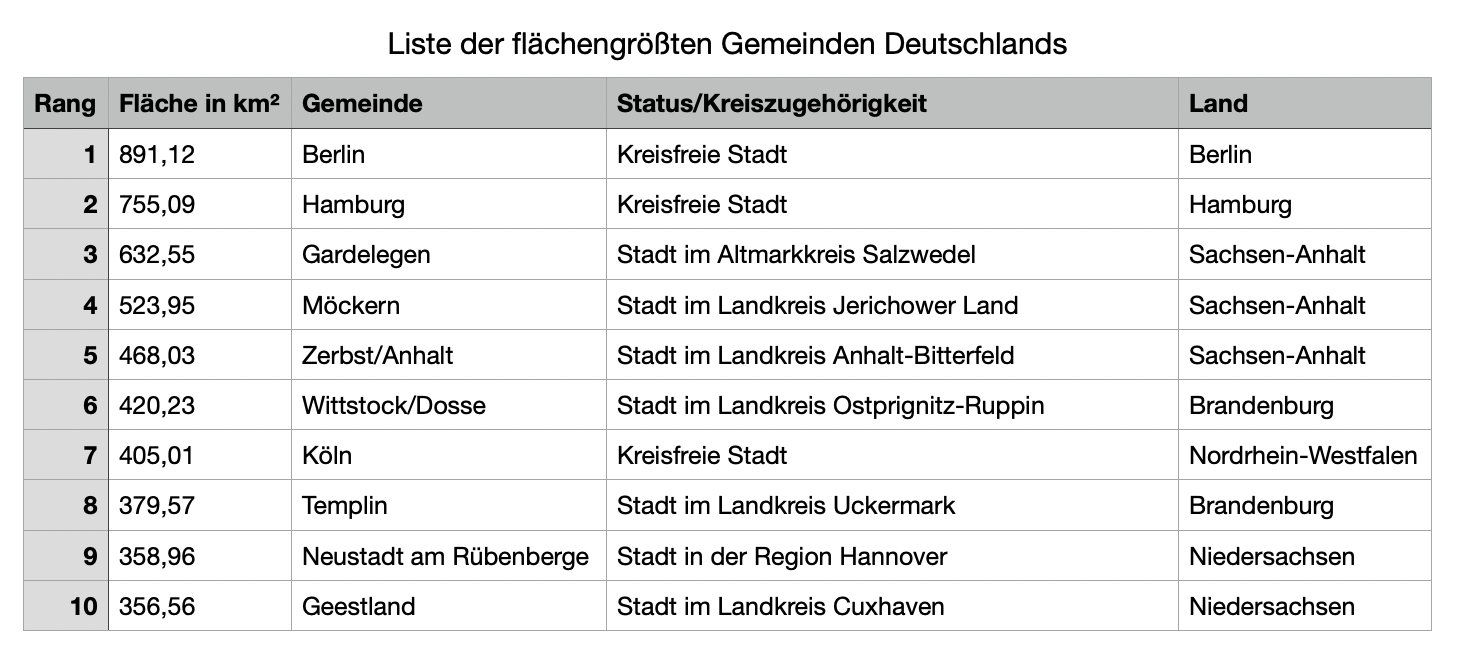

Der einzige strukturelle Unterschied zu Textdateien ist, dass es neben Zeilen auch eine zweite Strukturdimension gibt, nämlich die Spalten. 

"Hinter den Kulissen" werden die einzelnen Spalten durch ein Trennzeichen (verwirrenderweise teils *separator*, teils *delimiter* auf Englisch) strukturiert. Bei dieser Datei sind dies Semikola (Strichpunkte), wie wir hier sehen:

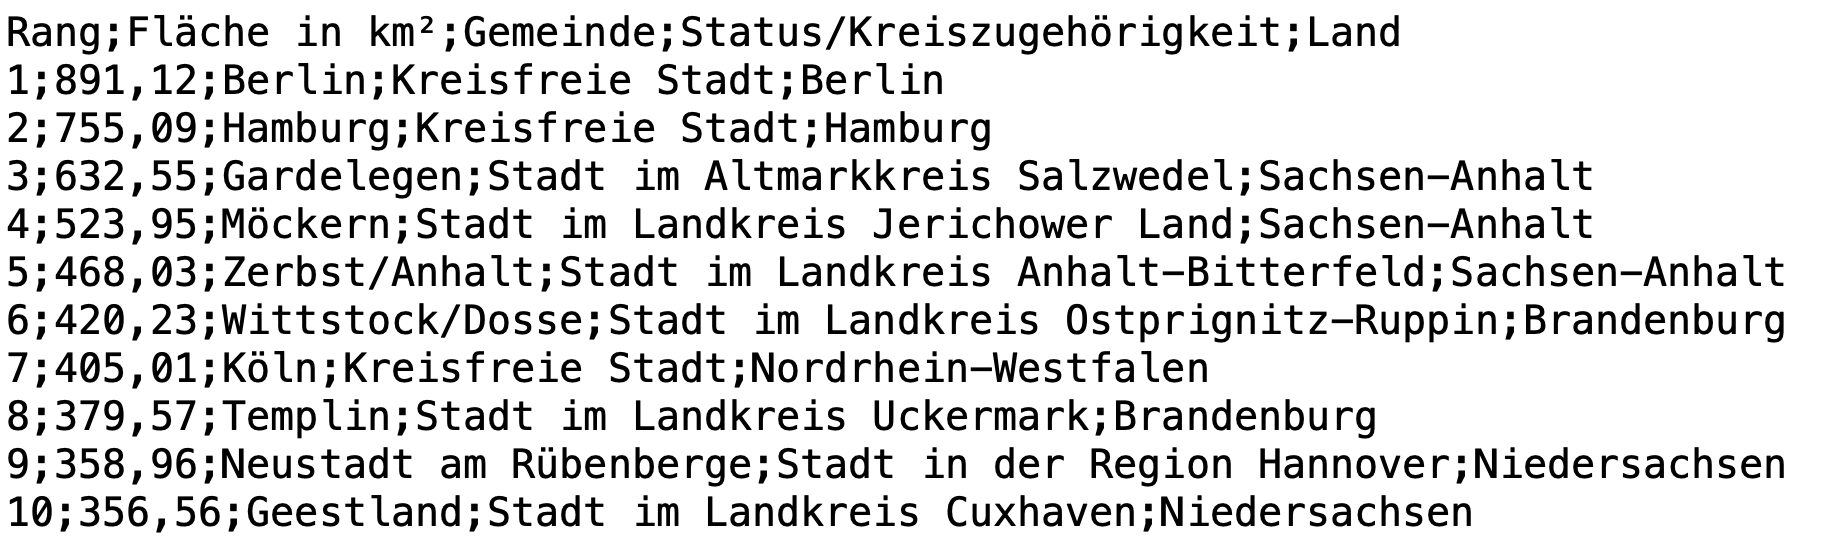

Die Zeilen wiederum werden wie bei Textdateien durch Zeilenumbrüche strukturiert, wobei die dafür zuständigen Zeichen im Screenshot oben einmal mehr nicht sichtbar sind.

Wenn wir tabellarische Dateien einlesen, müssen wir wissen, mithilfe welchen Trennzeichens sie auf der Spaltenebene strukturiert sind, damit die Daten einer Zeile an den richtigen Orten in Spalten unterteilt werden. Neben Semikola (```";"```) sind Kommata (```","```) oder Tabs (```"\t"```) übliche Trennzeichen. Wenn, wie oben, Semikola das Trennzeichen sind, können die anderen üblichen Trennzeichen ohne Weiteres zwischen den Semikola vorkommen (siehe z.B. die Kommata in den Flächenangaben). Auch beim Schreiben von tabellarischen Dateien müssen bzw. können wir spezifieren, welches Trennzeichen verwendet werden soll.

Zur Arbeit mit tabellarischen Daten (sowie generell für fortgeschrittene Datenanalyse) gibt es die Bibliothek ```pandas```, der das übernächste Notebook gewidmet ist. Hier schauen wir uns das ```csv```-Modul an, das sich für den einfachen Umgang mit tabellarischen Daten eignet.

### Das ```csv```-Modul

Wie üblich importieren wir das ```csv```-Modul zu Beginn. Ebenfalls setzen wir stets "csv." vor den Namen von Funktionen aus diesem Modul (vgl. oben zum ```os```-Modul).

Die Datei mit den flächengrößten Gemeinden lesen wir natürlich auch mittels ```open```, eingebettet in ein ```with```-Statement, ein. Das ```read_file``` übergeben wir zusammen mit dem korrekten Trennzeichen (```delimiter=";"```) der ```reader```-Funktion (beachte die "agentive" Benennung von Funktionen im ```csv```-Modul). Standardtrennzeichen ist übrigens das Komma (der Name des Moduls ist nämlich eine Abkürzung für *comma-separated values*), das wie immer nicht angegeben werden muss. 

Die ```reader```-Funktion gibt uns nun nicht ein gewöhnliches Python-Objekt zurück (etwa einen string oder eine Liste wie beim Textinput), sondern ein ```_csv.reader object```, das wir mit ```data``` referenzieren. Über dieses ```_csv.reader object``` können wir wie gewohnt iterieren und die einzelnen Zeilen einer Liste anhängen. Wir müssen das innerhalb der Einrückung machen, da  das ```_csv.reader object``` zusammen mit ```read_file``` wieder geschlossen wird, sobald wir die Einrückung verlassen:

In [ ]:
import csv

with open("../3_Dateien/Tabellarische_Daten/Liste_der_flächengrössten_Gemeinden_Deutschlands.csv", encoding="utf-8") as read_file:
    
    data = csv.reader(read_file, delimiter=";")
    biggest_municipalities = []
    
    for row in data:
        biggest_municipalities.append(row)

for i in range(6):
    print(biggest_municipalities[i])

***

✏️ **Übung 6:** Finde heraus, wieviele der 100 flächengrößten Gemeinden zu jedem der 16 Bundesländer gehören. Du kannst direkt mit ```biggest_municipalities``` weiterarbeiten. Dir steht ein dictionary mit Bundesländern zur Verfügung. Ziel ist es, den Wert (jetzt noch 0 für alle Bundesländer) für jedes Bundesland korrekt zu berechnen.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

federal_states = {'Baden-Württemberg': 0, 'Bayern': 0, 'Berlin': 0, 'Brandenburg': 0, 'Bremen': 0, 'Hamburg': 0, 'Hessen': 0, 
                'Mecklenburg-Vorpommern': 0, 'Niedersachsen': 0, 'Nordrhein-Westfalen': 0, 'Rheinland-Pfalz': 0, 'Saarland': 0, 
                'Sachsen': 0, 'Sachsen-Anhalt': 0, 'Schleswig-Holstein': 0, 'Thüringen': 0}


***

Sehr gut – in Brandenburg befinden sich also die meisten der 100 flächengrößsten Gemeinden Deutschlands.

Das dictionary ```federal_states``` wollen wir nun als Tabelle extern speichern. Die Tabelle wird ganz einfach aus zwei Spalten sowie 17 Zeilen (1 Zeile mit Spaltenüberschriften + 16 Bundesländer) bestehen. 

Der Output von tabellarischen Dateien funktioniert wie gewohnt in einem ```with```-Statement über die ```open```-Funktion mit dem Parameter ```"w"```. Nun kommt das Pendant zu ```reader```, nämlich ```writer```, zum Einsatz, dies jedoch auf ziemlich unintuitive Art. Wenn es Dich interessiert, wird im Folgenden erklärt, was da genau geschieht. Andernfalls ist es auch in Ordnung, die Syntax unten einfach zu copy-pasten, wann immer Du tabellarische Daten schreiben musst.

1. Wir initialisieren ein ```_csv.writer object```, indem wir der ```writer```-Funktion die zu beschreibende Datei (```write_file```) als Argument übergeben. Das ```_csv.writer object``` weisen wir der Variable ```federal_states_writer``` zu. Was wir nun in dieses Objekt reinschreiben, landet am Schluss in der externen Datei.
2. Wir wenden die Methode ```writerow``` auf das ```_csv.writer object``` an, um unsere Daten Zeile für Zeile zu schreiben:
    - wir schreiben die Spaltenüberschriften (```header```) in die erste Zeile
    - wir iterieren danach über ```federal_states``` und schreiben Zeile für Zeile in ```federal_states_writer```

In [ ]:
#damit wir auf dem gleichen Stand sind, wird das dictionary mit den korrekten Werten pro Schlüssel hier nochmal initialisiert
federal_states = {'Baden-Württemberg': 1, 'Bayern': 5, 'Berlin': 1, 'Brandenburg': 30, 'Bremen': 1, 'Hamburg': 1, 'Hessen': 2, 
                  'Mecklenburg-Vorpommern': 0, 'Niedersachsen': 15, 'Nordrhein-Westfalen': 13, 'Rheinland-Pfalz': 0, 
                  'Saarland': 0, 'Sachsen': 5, 'Sachsen-Anhalt': 24, 'Schleswig-Holstein': 1, 'Thüringen': 1}

with open("../3_Dateien/Output/Anzahl_der_groessten_Gemeinden_pro_Bundesland.csv", "w", encoding="utf-8") as write_file:
    
    federal_states_writer = csv.writer(write_file, delimiter=";")
    
    header = ["Bundesland", "Anzahl der 100 flächengrößten Gemeinden"]
    
    federal_states_writer.writerow(header)
    
    for row in federal_states.items():
        federal_states_writer.writerow(row)

Nun kennen wir die zwei grundlegenden Techniken zum Input bzw. Output von tabellarischen Dateien.

Vom Input externer Dateien wenden wir uns nun einer anderen Form des Inputs zu: User-Input in interaktiven Programmen.

## User-Input für interaktive Programme

Wie wir bereits im dritten Notebook gesehen haben, ist es ganz einfach, User-Input in Programme einzubauen. Wir verwenden dafür die ```input```-Funktion und übergeben ihr einen sog. *prompt* als string. Dieser *prompt* ist die Aufforderung, die der Benutzerin angezeigt wird, sobald Python die Code-Zeile mit der ```input```-Funktion erreicht. Das, was die Benutzerin nun eingibt (und durch Drücken von Enter "abschickt"), weisen wir direkt einer Variablen zu. 

Python interpretiert den Input standardmäßig als string. Wenn wir z.B. eine Ganzzahl erwarten (und der anschließende Code darauf ausgerichtet ist), müssen wir den Input vor der Variablenzuweisung entsprechend casten (s.u.).

Führe die folgende Zelle aus und agiere im Anschluss als Benutzer:in. Eventuell musst Du erst ins Antwortfeld unter der Frage klicken, sodass der Cursor blinkt.

In [ ]:
name = input("Wie heißt Du?\n")

#Handelt es sich um einen anderen Datentyp als string muss der Input gecastet werden
age = int(input("Und wie alt bist Du?\n"))

#ohne Casting würde diese bedingte Anweisung fehlschlagen, da strings nicht größer gleich 18 sein können
if age >= 18:
    print("Freut mich, ", name, ". Du darfst natürlich in den Club! 🎉", sep="")
else:
    print("Freut mich, ", name, ". Du darfst leider nicht in den Club! 😢", sep="")

Solltest Du im Folgenden beim Ausführen einer Code-Zelle auf die Fehlermeldung ```Cell not executed due to pending input``` stoßen, lies im dritten Notebook nach, woran das liegt.

Das ist auch schon alles, das wir über User-Input wissen müssen. 

Nun können wir uns unserem Anwendungsfall für dieses Notebook zuwenden.

***

## 🔧 Anwendungsfall: Einen Gedankenprotokollanten programmieren 

Deine Aufgabe ist es also, ein kleines interaktives Programm zu schreiben, mit dessen Hilfe eine Benutzerin schlaue Gedanken protokollieren kann. Hier folgt nochmal das gleiche Video vom Anfang:

In [ ]:
#Führe diese Zelle aus, um das Video einzubetten
from IPython.display import Video
Video("../3_Dateien/Grafiken_und_Videos/Gedankenprotokollant.mov", width=700)

Ergänzend zu diesem Video siehst Du unten eine Liste an einfachen Schritten, die – korrekt implementiert – die Aufgabe lösen und das im Video gezeigte Endprodukt verwirklichen. Diese einzelnen Schritte entsprechen dem zweiten Punkt beim algorithmischen Denken (nach der initialen Problemanalyse und vor der konkreten Implementierung).

Überlege Dir für jeden einzelnen Schritt, wie Du ihn konkret implementieren kannst, d.h. welche Funktionen oder Methoden sowie Kontrollstrukturen Du dafür benötigst. Schreibe zu jedem Punkt alle Techniken auf, mithilfe welcher Du den jeweiligen Punkt konkret in Code umsetzen kannst. Ignoriere dabei erst einmal, wie und in welcher Reihenfolge Du die Schritte anschließend miteinander verbindest:

1. Die Benutzerin wird gegrüßt und ihr wird erklärt, welche Funktionen das Programm ihr bietet.
2. Die Benutzerin wird aufgefordert, anzugeben, in welchem Dokument sie ihre(n) Gedanke(n) festhalten will. Handelt es sich um ein noch nicht existierendes Dokument, so wird es für sie geschaffen. Existiert das Dokument bereits, so soll(en) ihr(e) Gedanke(n) an dessen Ende gehängt werden.
3. Die Benutzerin wird aufgefordert, ihren Gedanken einzugeben.
4. Der Gedanke wird in das gewählte Dokument geschrieben.
5. Die Benutzerin wird zur Entscheidung aufgefordert, ob sie einen weiteren Gedanken im selben Dokument festhalten will oder ob sie das Programm verlassen will.
    1. Will die Benutzerin einen weiteren Gedanken festhalten, so soll das Programm zu Schritt 3 zurückspringen.
    2. Will die Benutzerin das Programm verlassen, so soll sie verabschiedet werden.

Du kannst nun wählen, ob Du von hier aus selbst weiter machen willst. Der nächste Arbeitsschritt besteht natürlich darin, die einzelnen Techniken *in der richtigen Reihenfolge* in Code zu implementieren. Verwende dafür die folgende Code-Zelle. Sollte Dir nicht zu allen fünf Schritten eine mögliche Technik einfallen, so findest Du nach der Code-Zelle mögliche Implementierungslösungen für jeden einzelen Schritt.

In [ ]:
# In diese Zelle kannst Du den Code zur Übung schreiben.






















Hier siehst, wie die einzelnen Schritte implementiert werden können.

1. Die Benutzerin wird gegrüßt und ihr wird erklärt, welche Funktionen das Programm ihr bietet. <br><br>
    - ```print("Gruß")``` bietet sich an, um die Benutzerin initial zu grüßen.
    - Alternativ könnte man den Gruß auch in den ```input```-*prompt* von Schritt 2 integrieren (```input("Gruß + prompt")```; so wurde das im Video umgesetzt), an der Benutzeroberfläche sind beide Alternativen gleichwertig.
    - Wie stellen wir sicher, dass der Gruß nur wirklich am Anfang angezeigt wird, und nicht nochmal, wenn die Benutzerin einen weiteren Gedanken festhalten will (5.A.)? Wir führen eine Variable ```first_time``` ein und setzen sie ganz am Anfang auf `True` (```first_time = True```); das ```print("Gruß")```-Statement bzw. das kombinierte ```input("Gruß + prompt")```-Statement führen wir nur aus, wenn ```first_time``` `True` ist (```if first_time == True```); nach dem ersten Durchlauf setzen wir ```first_time``` auf `False` (```first_time = False```), der Gruß wird somit nicht mehr ausgegeben.<br><br>
2. Die Benutzerin wird aufgefordert, anzugeben, in welchem Dokument sie ihre(n) Gedanke(n) festhalten will. Handelt es sich um ein noch nicht existierendes Dokument, so wird es für sie geschaffen. Existiert das Dokument bereits, so soll(en) ihr(e) Gedanke(n) an dessen Ende gehängt werden.
    - Den Namen des gewünschten Dokuments fragen wir über ```input(prompt)``` ab (ggf. mit dem Gruß davor, s.o.), das Resultat weisen wir einer Variablen namens ```file_name``` zu.
    - Wie unter 1. erwähnt, soll dieser ```input```-Befehl nur bedingt ausgeführt werden, nämlich nur  wenn ```first_time``` `True` ist (```if first_time == True```).
    - Das gewünschte Dokument öffnen wir in einem ```with```-Statement mittels ```open``` im *append*-Modus (```"a"```) und ```"encoding=utf-8"```. Der *append*-Modus schafft das gewünschte Dokument, sollte es noch nicht existieren. Wenn es bereits existiert, wird der neue Inhalt an das gewünschte Dokument angehängt. Wichtig: als Pfad übergeben wir der ```open```-Funktion einen konkatenierten string bestehend aus dem Pfad zum Verzeichnis (das kannst Du selbst auswählen), dem ```file_name``` sowie dem Suffix ".txt". Das geöffnete Dokument weisen wir wie üblich einer Variablen zu: ```as write_file```.<br><br>
3. Die Benutzerin wird aufgefordert, ihren Gedanken einzugeben.
    - Dafür verwenden wir wieder die ```input```-Funktion und weisen das Resultat der Variablen ```thought``` zu. Es spielt keine Rolle, ob wir dies vor oder eingerückt unter dem ```with```-Statement (s.o.) tun.<br><br>
4. Der Gedanke wird in das gewählte Dokument geschrieben.
    - Eingerückt unter dem ```with```-Statement wenden wir die ```write```-Methode auf ```write_file``` an, in die Klammern setzen wir ```thought``` sowie einen finalen Zeilenumbruch. ```thought``` wird jetzt also auf eine eigene Zeile in ```write_file``` geschrieben. Durch das Verlassen der Einrückung des ```with```-Statements wird das Dokument mit der neuen Zeile gespeichert und geschlossen.<br><br>
5. Die Benutzerin wird zur Entscheidung aufgefordert, ob sie einen weiteren Gedanken im selben Dokument festhalten will oder ob sie das Programm verlassen will.
    - Hier kommt nochmal ```input``` zum Einsatz. Da die Benutzerin ihre Entscheidung nicht über eine binäre "Ja/Nein"-Taste mitteilen kann, empfiehlt es sich, sie zur Eingabe eines "Y" (oder sonst eines bestimmten Buchstaben) aufzufordern, sollte sie noch einen weiteren Gedanken festhalten wollen. Andernfalls soll sie irgendeine andere Eingabe tätigen. Ihre Eingabe weisen wir der Variablen ```repeat``` zu.
     - Spätestens an dieser Stelle fällt uns auf, dass wir den gesamten vorherigen Code in eine Schleife einbauen müssen. Nämlich in eine (potentielle) Endlosschlaufe, die nur dann abgebrochen wird, wenn sich die Benutzerin dazu entscheidet, *keinen* weiteren Gedanken festzuhalten (5.B.). Dafür verwenden wir ```while True``` (vgl. drittes Notebook), eine Schleife, die sich unendlich wiederholt, es sei denn, Python trifft auf ein ```break```-Statement.
     - Am Ende des Codeblocks innerhalb der ```while```-Schleife müssen wir also prüfen, ob ```repeat``` "Y" (oder einem anderen festgelegten Zeichen) enspricht und abhängig davon, die Schleife abbrechen (```break```) oder nicht.<br><br>
    1. Will die Benutzerin einen weiteren Gedanken festhalten, so soll das Programm zu Schritt 3 zurückspringen.
        - In diesem Fall müssen wir nichts weiter machen, die Schleife läuft ja von alleine weiter. Einzig wichtig ist, dass der Gruß sowie die Aufforderung nach dem Namen des gewünschten Dokuments (Schritt 1 und 2) nicht wiederholt werden, indem wir hier ```first_time = False``` setzen.
        <br><br>
    2. Will die Benutzerin das Programm verlassen, so soll sie verabschiedet werden.
        - Entspricht ```repeat``` nicht "Y" (```if repeat != "Y"```), dann verabschieden wir uns von der Benutzerin über eine ```print```-Ausgabe und brechen die Endlossschleife ab (```break```).
        
Solltest Du den Anwendungsfall nicht bereits gelöst haben, versuche es nun mithilfe all dieser Techniken in der Code-Zelle oben.

***

Damit sind wir in der Lage, unsere Python-Programme über User-Input interaktiv zu gestalten. 😎

Abschließend schauen wir uns noch die vermutlich am häufigsten benutzte Funktion, nämlich ```print```, genauer an.

## Die ```print```-Funktion im Detail

```print``` gibt bekanntlich null, ein oder mehrere Objekte als string aus:

In [ ]:
number = 5

print() #print ohne Argument gibt einfach eine leere Zeile aus
print("Hier wird ein Objekt ausgegeben")
print("Hier werden zwei Objekte", "ausgegeben.")
print("Hier", "werden", number, "Objekte", "ausgegeben.")

Am dritten und vierten Beispiel sehen wir, dass ```print``` die einzelnen Objekte mit einem Leerschlag dazwischen konkateniert. Verantwortlich dafür ist der ```sep```-Parameter, der standardmäßig einem Leerschlag entspricht, aber natürlich anders spezifiziert werden kann:

In [ ]:
print("Leer", "schlag", sep="")
print(13, 10, 1988, sep=".", end=" / ") #deutsche Schreibweise
print(10, 13, 1988, sep="-") #US-amerikanische Schreibweise

Im zweiten Beispiel haben wir zudem einen ```end```-Parameter spezifiziert. Überleg Dir für einen Augenblick, was hier der Standardwert sein könnte.

Genau, ein Zeilenumbruch.

Der letzte optionale Parameter der ```print```-Funktion heißt ```file```. Statt das/die übergegebe(n) Argument(e) standardmäßig im Outputfeld von JupyterLab auszugeben, können wir den Output in eine externe Datei *umleiten*. Wichtig dabei ist, dass die Datei geöffnet ist:

In [ ]:
with open("../3_Dateien/Output/print_file.txt", "a") as write_file:
    print("So können wir in eine externe Datei schreiben.", file=write_file)
    
    #Dabei besteht übrigens kein Unterschied zur oben kennengelernten write-Methode
    #write_file.write("So können wir in eine externe Datei schreiben.")

Wenn Du diese Zelle mehrfach ausführst, schreibst Du jedes Mal eine weitere Zelle in die externe Datei. Dies liegt natürlich am *append*-Modus.

### f-strings

Im Zusammenhang mit ```print``` sind auch die sog. *f-strings* (abgekürzt für *formatted string literals*) zu erwähnen. Gleich wie ```print``` (für die Ausgabe) und die Zeichenketten-Konkatenation mithilfe von ```+``` (vgl. erstes Notebook) können wir f-strings dazu nutzen, beliebig viele Werte zu einem string zusammenzusetzen. Das sieht syntaktisch so aus:

In [ ]:
letter = "f"
sentence = f"Ein f-string beginnt mit einem kleinen '{letter}' oder großen '{letter.upper()}'."
print(sentence)

Steht ein "f"/"F" vor dem öffnenden Anführungszeichen eines strings, können wir beliebig viele Werte, jeweils umrahmt von geschweiften Klammern *in* den string reinpacken. Der Wert kann dabei direkt von einer Variablen kommen (oben ```letter```) oder das Ergebnis eines komplexen Ausdrucks sein (oben bei ```letter.upper()```).  

Als Erinnerung (vom ersten Notebook): ein komplexer Ausdruck wie eine arithmetische Operation (```2*3```), eine Funktion (```sorted``` oder ```len```), eine Methode (s.o.), ein Werteabruf in einem dictionary (```dictionary[key]```) etc. gibt immer *einen* Wert zurück (```6``` beim Beispiel für die arithmetische Operation). Genau dieser Wert wird dann an der Stelle der geschweiften Klammern im string eingesetzt.

Der selben Logik entsprechend lassen sich auch bedingte Anweisungen in einen f-string integrieren. Folgenden Code kennen wir bereits von oben. Dank f-strings ist er nun aber wesentlich kürzer:

In [ ]:
name = input("Wie heißt Du?")
age = int(input("Und wie alt bist Du?"))

print(f"Freut mich, {name}. Du darfst {'leider nicht' if age < 18 else 'natürlich'} in den Club.")

Spannender als das Einbauen von Werten in strings sind aber die durch f-strings entstehenden, unzähligen Möglichkeiten, diese Werte zu *formatieren*. Im Folgenden wollen wir uns auf die zwei wichtigsten Formatiermöglichkeiten konzentrieren. Weitere findest Du im Cheat Sheet zu f-strings.

1. Nachkommastellen: Besonders praktisch ist die Möglichkeit, die Anzahl an Nachkommastellen bei Dezimalzahlen festzulegen:

In [ ]:
value = 23.238457584

#hier runden wir "value" auf zwei Nachkommastellen
print(f"Zahl mit nur zwei Nachkommastellen: {value:.2f}") 

Egal wie ein Wert formatiert werden soll, die Formatierung wird durch einen Doppelpunkt nach dem Wert eingeleitet. 

Danach wird spezifiziert, wie der Wert formatiert werden soll: ```.2``` definiert im Beispiel oben, dass ```value``` auf zwei Nachkommastellen gekürzt werden soll, das ```f``` definiert, als welcher Datentyp der formatierte Wert ausgegeben werden soll (hier als Dezimalzahl, wobei das *f* von der englischen Bezeichnung *float* herrührt).

2. Ausrichten von Zahlen: Ebenso praktisch ist es, mehrere Zahlen, die aus einer unterschiedlichen Anzahl an Ziffern bestehen, einheitlich untereinander auszurichten:

In [ ]:
value1 = 1
value2 = 123
print(f"Schön ausgerichtete Zahl: {value1:3} (ohne 'Auffüllung')")
print(f"Schön ausgerichtete Zahl: {value1:03} (mit Nullen 'aufgefüllt')")
print(f"Schön ausgerichtete Zahl: {value2:3} (keine 'Auffüllung', da dreiziffrig)")

Hier definieren wir nach dem Doppelpunkt einen sog. *digit space*, also die Anzahl an Stellen, die zur Ausgabe verwendet werden soll. In den Beispielen oben wird der digit space als aus drei Stellen bestehend definiert. Optional können wir davor angeben, ob etwaige leere Stellen (da die Zahl aus weniger Ziffern als Stellen des digit space besteht) mit Nullen "aufgefüllt" werden sollen (engl. *zero padding*). Zahlen, die aus weniger Ziffern als der digit space bestehen und nicht zero-gepaddet werden, werden rechtsbündig ausgegeben. Wie Du diese Ausrichtung innerhalb des vorgegebenen digit space ändern kannst (engl. *alignment*), findest Du im Cheat Sheet.

Digit space und Nachkommastellen können natürlich auch zusammen definiert werden, die syntaktische Reihenfolge sieht dann so aus (die Leerschläge dienen nur der besseren Lesbarkeit und müssen im Code entfernt werden!):

```f"{value: (zero_padding) digit_space . decimals type}```

Genau diese Kombination aus digit space und Nachkommastellen kannst Du nun in der letzten Übung einsetzen.

***

✏️ **Übung 7:** In ```shopping_list``` finden sich Schlüssel-Werte-Paare bestehend aus Lebensmitteln und dem jeweiligen Preis. Deine Aufgabe ist es, die Ausgabe mithilfe von f-strings wie im folgenden Screenshot gezeigt auszugeben.

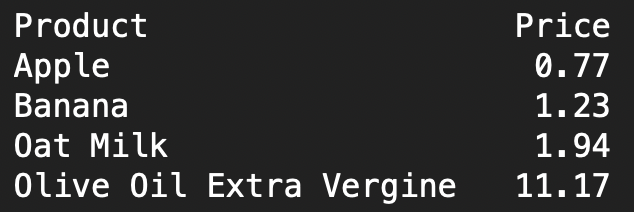

Hinweis 1: Einen digit space kannst Du nicht nur für Zahlen, sondern für Objekte jeglichen Datentyps festlegen. Der digit space für die Spalte "Product" soll 25 Stellen betragen, derjenige für "Price" 5.

Hinweis 2: Wie erwähnt werden Zahlen innerhalb des digit space standardmäßig rechtsbündig ausgerichtet. Strings werden hingegen innerhalb des digit space standardmäßig linksbündig ausgerichtet (Tabellenkalkulationsprogramme legen das gleiche Verhalten an den Tag, wie Dir vielleicht schon aufgefallen ist). Um die Darstellung im Screenshot umzusetzen, musst Du Dich folglich nicht um das Alignment kümmern, da es dem Standard entspricht.

In [ ]:
#In diese Zelle kannst Du den Code zur Übung schreiben

shopping_list = {"Apple": 0.77, "Banana": 1.23, "Oat Milk": 1.944, "Olive Oil Extra Vergine": 11.17}




***

Damit wissen wir alles Wichtige rund um In- und Output von Daten. Gute Arbeit!